# **<center>Stock Price Prediction with Technical & Fundamental Analysis</center>**
**Stock**
* Stocks, each unit of which is called a share, represent ownership of a company. Stocks, owned either directly or through a mutual fund or ETF, will likely form the majority of most investor’s portfolios. 

**Resource**
* https://towardsdatascience.com/data-analysis-visualization-in-finance-technical-analysis-of-stocks-using-python-269d535598e4
* https://towardsdatascience.com/making-a-trade-call-using-simple-moving-average-sma-crossover-strategy-python-implementation-29963326da7a
* https://medium.com/fintechexplained/automating-stock-investing-technical-analysis-with-python-81c669e360b2
* https://medium.com/fintechexplained/speaking-traders-language-14a22df720a6
* https://medium.com/fintechexplained/automating-stock-investing-fundamental-analysis-with-python-f854781ee0b4
* https://www.investopedia.com/terms/t/todayslow.asp
* https://technical-analysis-library-in-python.readthedocs.io/en/latest/

In [1]:
# !pip install --upgrade pandas-datareader
!pip install yfinance
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
import pandas_datareader as data
import datetime
import warnings
warnings.filterwarnings('ignore')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
 df = yf.download("ADANIENT.NS", start="2010-01-01", end="2023-02-12")
 df=df.round(2)

[*********************100%***********************]  1 of 1 completed


In [3]:
df.sort_values(by ='Date', ascending = False).head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-02-10,1769.00,1990.00,1733.15,1846.95,1846.95,11334878
2023-02-09,2168.00,2168.00,1731.40,1925.70,1925.70,18279862
2023-02-08,1869.85,2222.15,1840.85,2164.25,2164.25,19173006
2023-02-07,1571.00,1962.70,1525.60,1802.95,1802.95,19188072
2023-02-06,1575.00,1615.00,1435.20,1572.70,1572.70,19308603


### **Key Definitions**
**Open:** The opening price of a stock at the beginning of a trading day.

**High:** The highest price a stock reaches during a trading day.

**Low:** The lowest price a stock reaches during a trading day.

**Close:** The closing price of a stock at the end of a trading day.

**Adj Close:** The adjusted closing price of a stock, which takes into account any dividends, stock splits, or other corporate actions that occurred during the day.

**Volume:** The number of shares of a stock that were traded during a particular trading day. This is an important indicator of market activity and can provide insight into the level of buying and selling interest in a particular stock.

In [4]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-02-06,1575.00,1615.00,1435.20,1572.70,1572.70,19308603
2023-02-07,1571.00,1962.70,1525.60,1802.95,1802.95,19188072
2023-02-08,1869.85,2222.15,1840.85,2164.25,2164.25,19173006
2023-02-09,2168.00,2168.00,1731.40,1925.70,1925.70,18279862
2023-02-10,1769.00,1990.00,1733.15,1846.95,1846.95,11334878


In [5]:
df.shape

(3238, 6)

In [6]:
df = df.reset_index()

In [7]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [8]:
df.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

In [9]:
df['Date'].max() - df['Date'].min()

Timedelta('4785 days 00:00:00')

* There are approximately 252 trading days in an year with an average of 21 days per month, or 63 days per quarter. Out of a possible 365 days, 104 days are weekends (Saturday and Sunday) when the stock exchanges are closed.

**High-level overview of how the Adani Enterprises stock performed in about last couple of months** 

In [10]:
df.iloc[-90:].describe().astype(int)

,Open,High,Low,Close,Adj Close,Volume
count,90,90,90,90,90,90
mean,3539,3594,3444,3517,3517,4291609
std,595,562,668,620,620,7059932
min,1490,1615,1017,1565,1565,248249
25%,3320,3345,3266,3302,3302,1280870
50%,3726,3811,3618,3718,3718,1822552
75%,3945,4018,3880,3928,3928,3053920
max,4175,4190,4066,4165,4165,43885579


* In last 90 days, the average closing price for Adani Enterprises  was about ₹3517.
* Min price in the last 90 days clocked 1565.
* For about 75% of time the stock was trading below ₹3928 and it clocked maximum of ₹4165. The maximum volume of shares traded on a single day was 43885579 with median quantity being 1822552.
* Based on the above few points, on broad level we can certainly say that the stock is highly volatile.

In [11]:
df.index = df['Date']

**Now plot the closing price (adjusted) of the stock over the period of 14 years to get a general idea of how the stock performed in the given period**

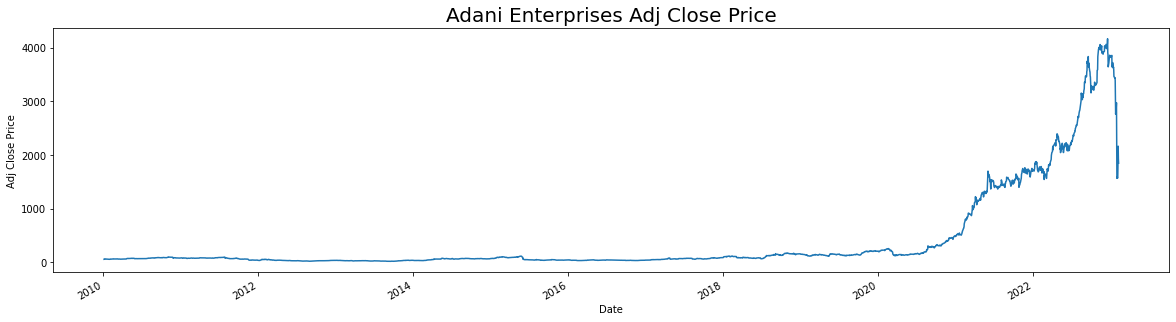

In [12]:
df['Adj Close'].plot(figsize = (20,5))
plt.title("Adani Enterprises Adj Close Price", fontsize = 20)
plt.xlabel('Date')
plt.ylabel('Adj Close Price')
plt.show()

* In the above plot, if you notice, there is a  increase in the price of stock sometime around 2021

**Let's plot for last 2 years and see the trends**

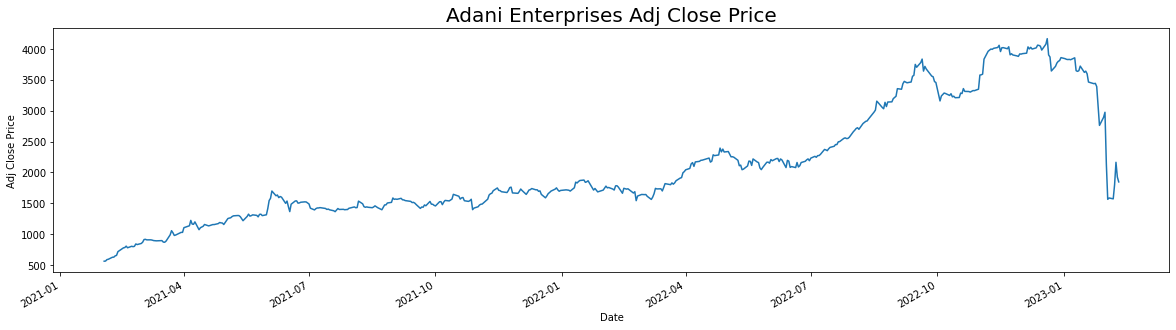

In [13]:
df['Adj Close'].iloc[-504:].plot(figsize = (20,5))
plt.title("Adani Enterprises Adj Close Price", fontsize = 20)
plt.xlabel('Date')
plt.ylabel('Adj Close Price')
plt.show()

* As the trends of the stock was upwards and suddenly there is a drastic decrese around Jan'21. The main reason for this drastic decrease was Hindenburg report

## **Day-to-day percentage change(Daily returns)**
* Daily percentage change in the price of the stock is calculated on the basis of percentage change between 2 consecutive days’ closing prices. Let’s say if the closing price of the stock yesterday was ₹500 and today the stock closed as ₹550. So, the percentage change is 10%. i.e. ((550–500) / 500)*100.

In [14]:
df['Day_Perc_Change'] = df['Adj Close'].pct_change()*100
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Day_Perc_Change
Date,,,,,,,,
2010-01-04,2010-01-04,67.01,69.59,66.37,69.22,57.30,1860224,NaN
2010-01-05,2010-01-05,69.43,71.11,69.43,70.82,58.62,2280286,2.303665
2010-01-06,2010-01-06,70.97,79.24,70.51,77.81,64.41,7326390,9.877175
2010-01-07,2010-01-07,79.61,79.61,74.03,74.60,61.75,4759208,-4.129794
2010-01-08,2010-01-08,75.07,77.86,73.91,75.54,62.53,3324076,1.263158


In [15]:
# Drop 1st value because it is Nan
df.dropna(axis = 0, inplace = True)

**Plot a graph for daily returns over the priods of 13 years**

Text(0, 0.5, 'Percenatge returns')

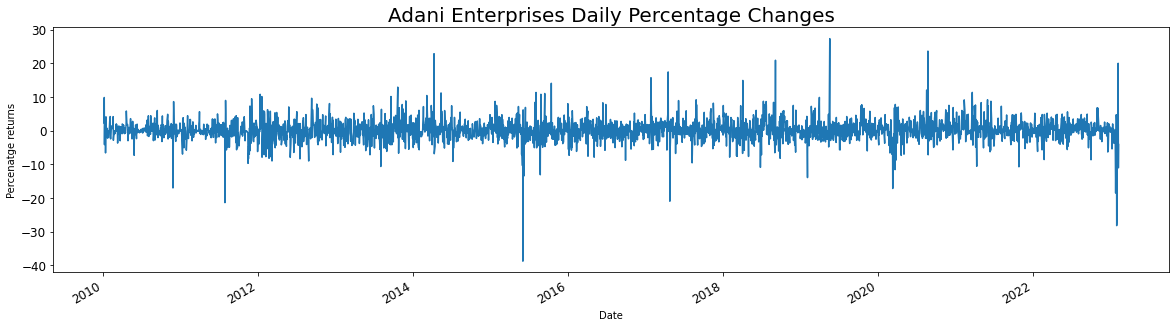

In [16]:
df['Day_Perc_Change'].plot(figsize = (20, 5), fontsize = 12)
plt.title("Adani Enterprises Daily Percentage Changes", fontsize = 20)
plt.xlabel('Date')
plt.ylabel('Percenatge returns')

* As observed, the daily returns percentage is fluctuatiing between -10 % to 10 % for most of the time with few instance of drastic negative and postive changes

**Plot a graph for daily returns over the priods of 2 years**

Text(0, 0.5, 'Percenatge returns')

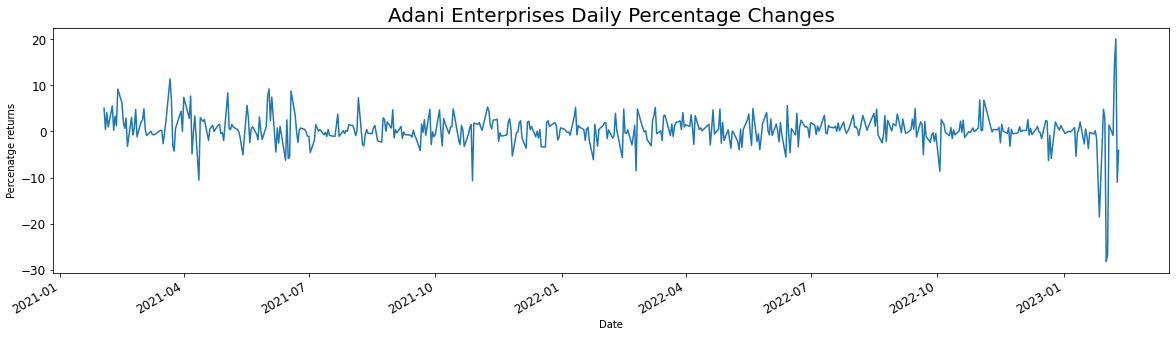

In [17]:
df['Day_Perc_Change'].iloc[-504:].plot(figsize = (20, 5), fontsize = 12)
plt.title("Adani Enterprises Daily Percentage Changes", fontsize = 20)
plt.xlabel('Date')
plt.ylabel('Percenatge returns')

* As observed, in thelast 2 years the daily returns percentage is fluctuatiing between -10 % to 10 % for most of the time with one instance of drastic negative changes in the month of Jan'23 due to hindenburg report

**Plot daily return distribution histogram**

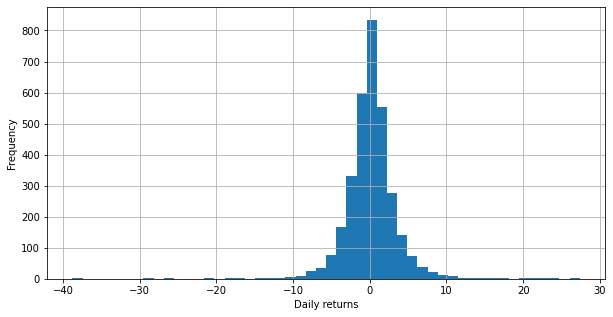

------------------------------------
Basic Statisics for Daily Percentages for 13 years


count    3237.000000
mean        0.161993
std         3.273141
min       -38.749320
25%        -1.309541
50%         0.102775
75%         1.617840
max        27.367529
Name: Day_Perc_Change, dtype: float64

In [18]:
df['Day_Perc_Change'].hist(bins = 50, figsize = (10,5)) 
plt.xlabel('Daily returns')
plt.ylabel('Frequency')
plt.show()
print("------------------------------------")
print("Basic Statisics for Daily Percentages for 13 years")
df['Day_Perc_Change'].describe()

* The daily returns histogram is centered about origin. For the past 13 years, the mean daily returns has been about 0.161993% and for most of the days the daily return was less than 1% implying that the ADANI Enterprises stock has been less volatile over the period. During the period, the highest % change in positive direction was observed to be 27.367529% and was 38.749320% in negative direction

**Plot daily return distribution histogram over the priods of 2 years**

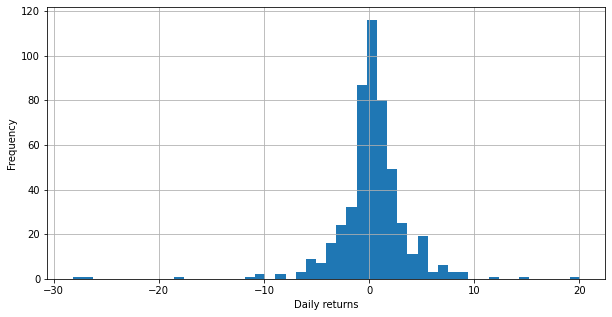

------------------------------------
Basic Statisics for Daily Percentages for 2 years


count    504.000000
mean       0.309905
std        3.496847
min      -28.196980
25%       -0.807568
50%        0.320864
75%        1.591334
max       20.039380
Name: Day_Perc_Change, dtype: float64

In [19]:
df['Day_Perc_Change'].iloc[-504:].hist(bins = 50, figsize = (10,5)) 
plt.xlabel('Daily returns')
plt.ylabel('Frequency')
plt.show()
print("------------------------------------")
print("Basic Statisics for Daily Percentages for 2 years")
df['Day_Perc_Change'].iloc[-504:].describe()

* The daily returns histogram is centered about origin. For the past 2 years, the mean daily returns has been about 0.309905% and for most of the days the daily return was less than 1% implying that the ADANI Enterprises stock has been less volatile over the period. During the period, the highest % change in positive direction was observed to be 20.039380% and was 28.196980% in negative direction

## **Trend Analysis**
**Trend is determined from below relationship —**
<center>
<table>
  <tr>
    <th>Daily Percentage Change</th>
    <th>Trend</th>
  </tr>
  <tr>
    <td>-0.5 to 0.5</td>
    <td>Slight or No Change</td>
  </tr>
  <tr>
    <td>0.5 to 1</td>
    <td>Slight Positive</td>
  </tr>
  <tr>
    <td>-0.5 to -1</td>
    <td>Slight Negative</td>
  </tr>
  <tr>
    <td>1 to 3</td>
    <td>Positive</td>
  </tr>
  <tr>
    <td>-1 to -3</td>
    <td>Negative</td>
  </tr>
  <tr>
    <td>3 to 7</td>
    <td>Among Top Gainers</td>
  </tr>
  <tr>
    <td>-3 to -7</td>
    <td>Among Top Losers</td>
  </tr>
  <tr>
    <td>Above 7</td>
    <td>Bull Run</td>
  </tr>
  <tr>
    <td>Below 7</td>
    <td>Bear Drop</td>
  </tr>
</table>
</center>

In [20]:
def trend(x):
  if x > -0.5 and x <= 0.5:
    return 'Slight or No change'
  elif x > 0.5 and x <= 1:
    return 'Slight Positive'
  elif x > -1 and x <= -0.5:
    return 'Slight Negative'
  elif x > 1 and x <= 3:
    return 'Positive'
  elif x > -3 and x <= -1:
    return 'Negative'
  elif x > 3 and x <= 7:
    return 'Among top gainers'
  elif x > -7 and x <= -3:
    return 'Among top losers'
  elif x > 7:
    return 'Bull run'
  elif x <= -7:
    return 'Bear drop'
df['Trend']= np.zeros(df['Day_Perc_Change'].count())
df['Trend']= df['Day_Perc_Change'].apply(lambda x:trend(x))
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Day_Perc_Change,Trend
Date,,,,,,,,,
2010-01-05,2010-01-05,69.43,71.11,69.43,70.82,58.62,2280286,2.303665,Positive
2010-01-06,2010-01-06,70.97,79.24,70.51,77.81,64.41,7326390,9.877175,Bull run
2010-01-07,2010-01-07,79.61,79.61,74.03,74.60,61.75,4759208,-4.129794,Among top losers
2010-01-08,2010-01-08,75.07,77.86,73.91,75.54,62.53,3324076,1.263158,Positive
2010-01-11,2010-01-11,75.72,77.70,75.72,76.89,63.65,1196678,1.791140,Positive


### **Pie chart**

**Past 13 years trend**

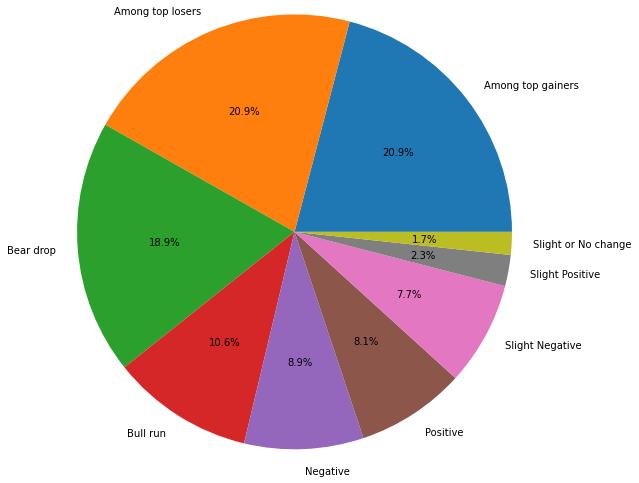

In [21]:
plt.figure(figsize=(20,5))
pie_label = sorted([i for i in df.loc[:, 'Trend'].unique()])
plt.pie(df['Trend'].value_counts(), labels = pie_label, autopct = '%1.1f%%', radius = 2)
plt.show()

* For the 13 yeras period, the ADANI Enterprise stock was among the top gainers for about 20.9% of the time, and among the top losers for 20.9 %. 
* For about 8.1% of the time period, the stock has performed positively on a given day. 
* Likewise, for most period of time (about 1.7%) the stock showed a very slight change in the price. These observations are consistent with the daily return histogram we saw in above section.

**Past 2 years trend**

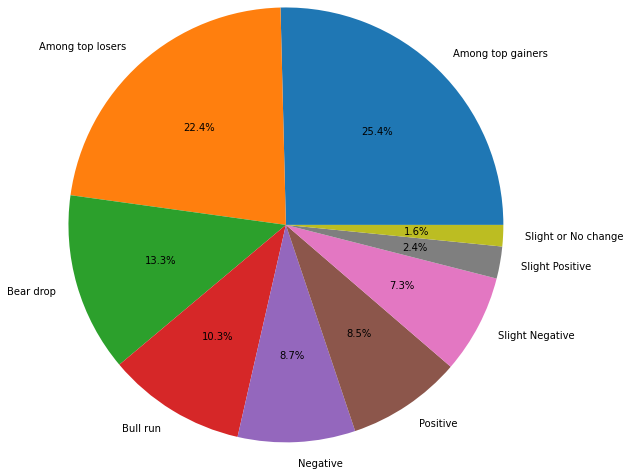

In [22]:
plt.figure(figsize=(20,5))
pie_label = sorted([i for i in df.loc[:, 'Trend'].unique()])
plt.pie(df['Trend'].iloc[-504:].value_counts(), labels = pie_label, autopct = '%1.1f%%', radius = 2)
plt.show()

* For the 2 yeras period, the ADANI Enterprise stock was among the top gainers for about 25.4% of the time, and among the top losers for 22.4 %. 
* For about 8.7% of the time period, the stock has performed positively on a given day. 
* Likewise, for most period of time (about 1.6%) the stock showed a very slight change in the price. These observations are consistent with the daily return histogram we saw in above section.

## **Daily Returns and Volume**

**FOr 13 years period**

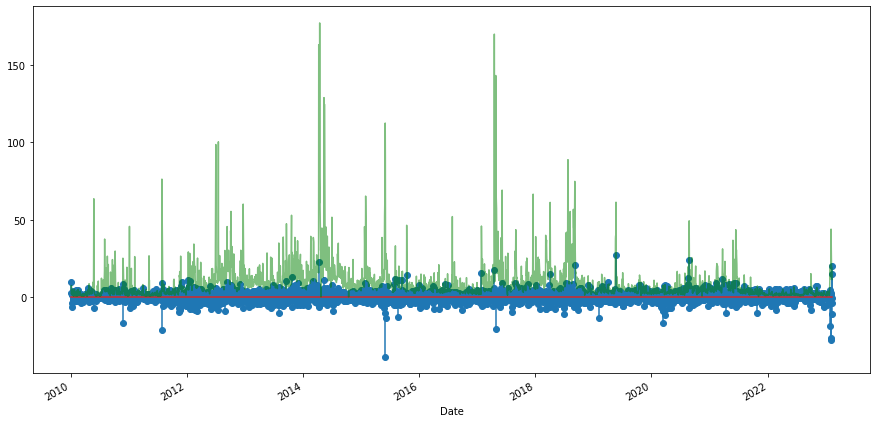

In [23]:
plt.stem(df['Date'], df['Day_Perc_Change'])
(df['Volume']/1000000).plot(figsize = (15, 7.5), color = 'green', alpha = 0.5)
# Daily volume of trade has been reduced in scale to match with the daily return scale

* By juxtaposing the daily trade volume(in green) with the daily returns(in blue), it was observed that whenever the volume of shares traded is high, there is comparatively high rise or fall in the price of the stock leading to the high returns. 
* Thus, on a given day if unconventionally high volume of trading takes place, then one can expect a big change in the market in the either direction. 
* Volume of shares traded when coupled with the rise or fall in Price of stock, in general, is an indicator of the confidence of the traders & investors in a particular company

**FOr 2 years period**

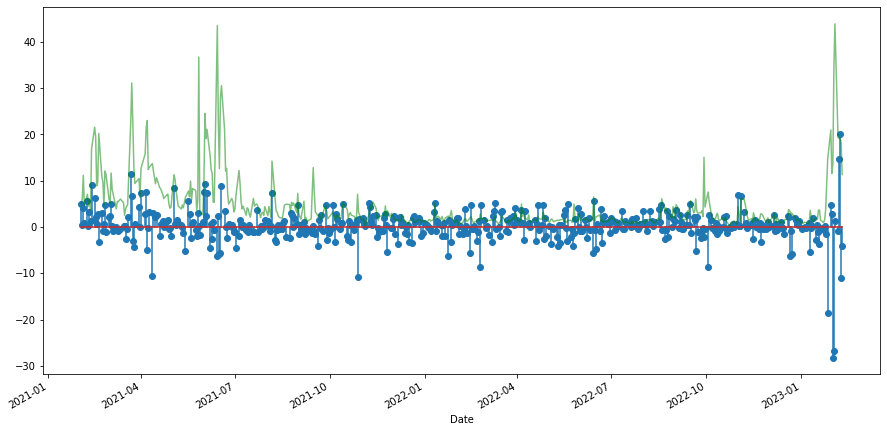

In [24]:
plt.stem(df['Date'].iloc[-504:], df['Day_Perc_Change'].iloc[-504:])
(df['Volume'].iloc[-504:]/1000000).plot(figsize = (15, 7.5), color = 'green', alpha = 0.5)
# Daily volume of trade has been reduced in scale to match with the daily return scale

* By juxtaposing the daily trade volume(in green) with the daily returns(in blue), it was observed that whenever the volume of shares traded is high, there is comparatively high rise or fall in the price of the stock leading to the high returns. 
* Thus, on a given day if unconventionally high volume of trading takes place, then one can expect a big change in the market in the either direction. 
* Volume of shares traded when coupled with the rise or fall in Price of stock, in general, is an indicator of the confidence of the traders & investors in a particular company

## **Correlation Analysis Of Stocks with Pair plot and Joint plots**
* “Never put all your eggs in a single basket”

* Whenever we go for the diversification of the portfolio, we would NOT want the stocks to be related to each other. Mathematically, Pearson’s correlation coefficient (also called Pearson’s R value) between any pair of stocks should be close to 0. The idea behind is simple — suppose your portfolio comprises of the stocks that are highly correlated, then if one stock tumbles, the others might fall too and you’re at the risk of losing all your investment!

* I selected the aforementioned stocks to perform the correlation analysis. All these stocks are from different segments of Industry and Market cap. You are free to choose the stocks of your interest. the procedure remains the same.


In [25]:
# Adj close price of all the stocks
combined_df = yf.download(["ADANIENT.NS","TATASTEEL.NS","PAGEIND.NS","EICHERMOT.NS","INFY.NS"], start="2010-01-01", end="2023-02-12")['Adj Close']
combined_df = combined_df.round(2)
combined_df.head()

[*********************100%***********************]  5 of 5 completed


,ADANIENT.NS,EICHERMOT.NS,INFY.NS,PAGEIND.NS,TATASTEEL.NS
Date,,,,,
2010-01-04,57.30,57.19,246.82,753.88,20.36
2010-01-05,58.62,55.28,247.65,755.41,20.86
2010-01-06,64.41,54.82,244.03,750.91,20.63
2010-01-07,61.75,54.05,238.55,759.77,20.88
2010-01-08,62.53,54.78,232.80,759.55,20.84


### **Pairplot**

<Figure size 1440x360 with 0 Axes>

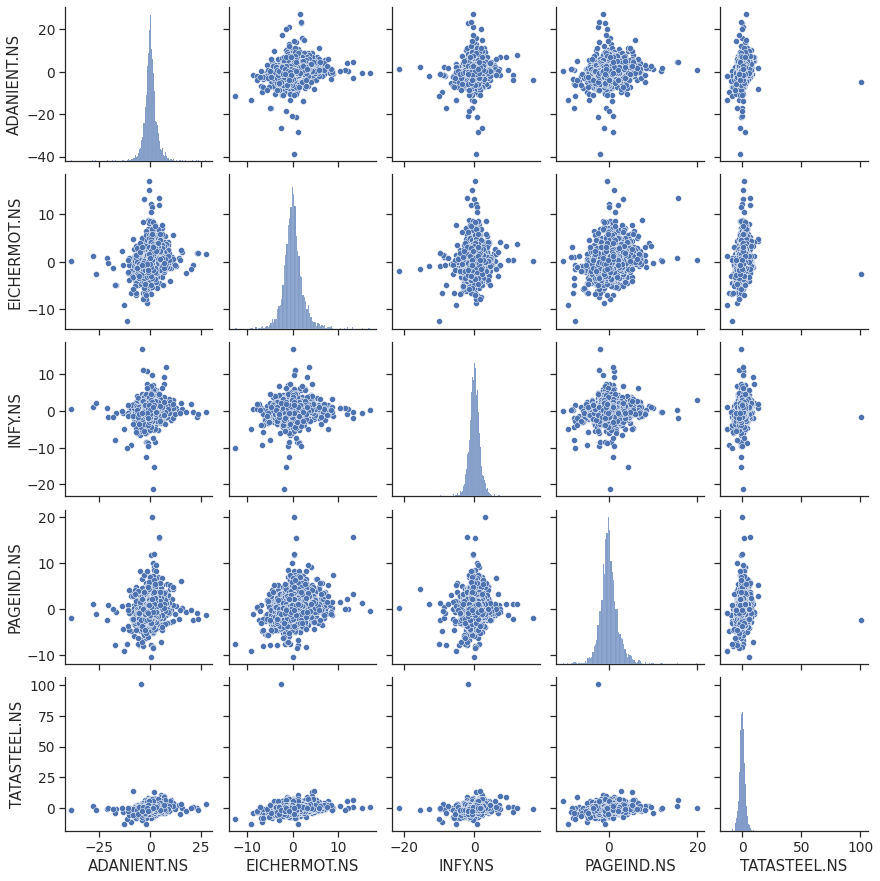

In [26]:
# store daily returns of all above stocks in a new dataframe 
pct_chg_df = combined_df.pct_change()*100
pct_chg_df.dropna(inplace = True, how = 'any', axis = 0)
# plotting pairplot  
import seaborn as sns
plt.figure(figsize = (20,5))
sns.set(style = 'ticks', font_scale = 1.25)
sns.pairplot(pct_chg_df)

* ***Correlation analysis is performed on the daily percentage change(daily returns) of the stock price and not on the stock price.***
* If you observe carefully, the plots in the lower triangular area are the same as the plots in the upper triangular area with just axes interchanged. So, analyzing either set of plots would suffice. The diagonal represents the histograms, just like the one seen above for ADANI Enterprises stock.
* ADANI ENTERPRISES, EICHER MOTORS , INFY ,PAGEIND and TATASTEEL can be included in a portfolio as no two stocks show any significant correlation.


---


**Drawback of Correlation PLots:**
* Although the pair plots provide very good visualization of all possible combinations between the bunch of stocks, it doesn’t provide any detailed information like Pearson’s R value or null-hypothesis p value to quantify the correlation. That’s where the joint plot comes into the picture!

### **Jointplot**
* While Pair plot provides a visual insight into all possible correlations, Seaborn jointplot provides detailed information like Pearson’s R value (Pearson’s correlation coefficient) for each pair of stocks. Pearson’s R value ranges from -1 to 1. Negative value indicates a negative linear relation between the variables, while positive value indicates a positive relationship. Pearson’s R value closer to 1 (or -1) indicates strong correlation, while value closer to 0 indicates weak correlation.

* In addition to Pearson’s R value, joint plot also shows the respective histograms on the edges as well as null hypothesis p-value.



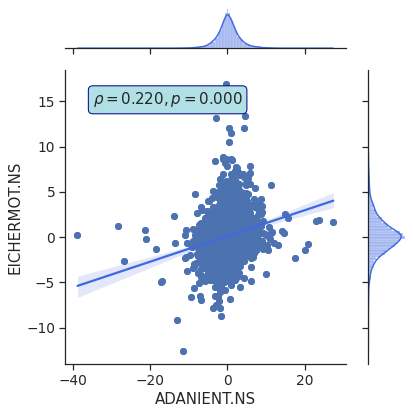

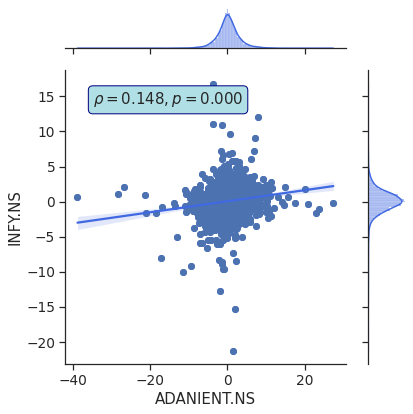

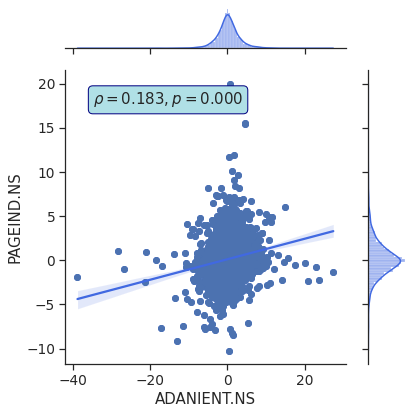

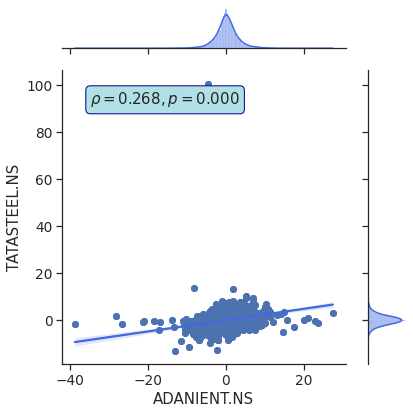

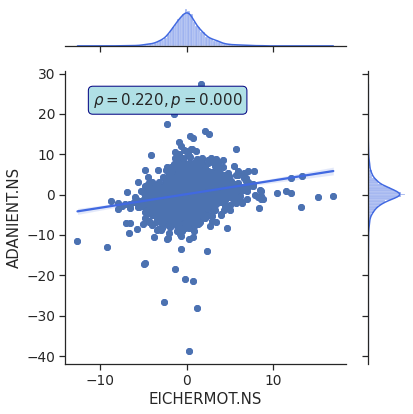

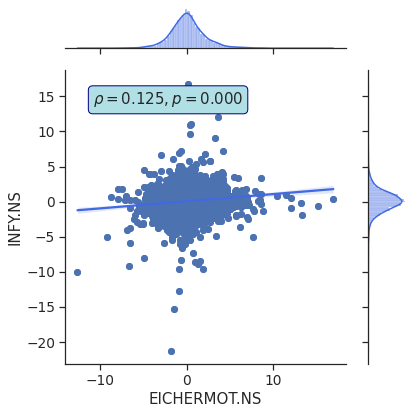

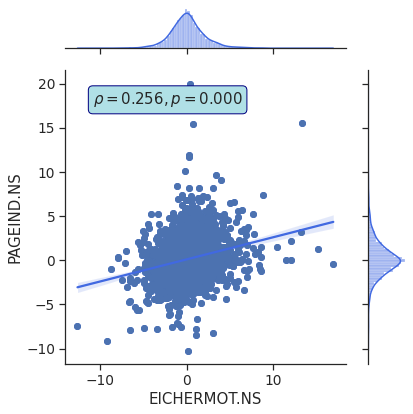

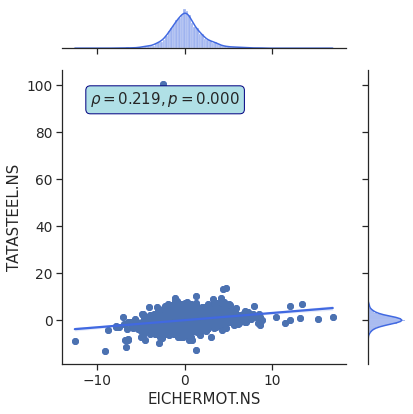

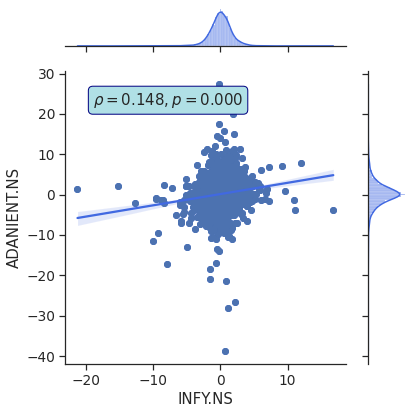

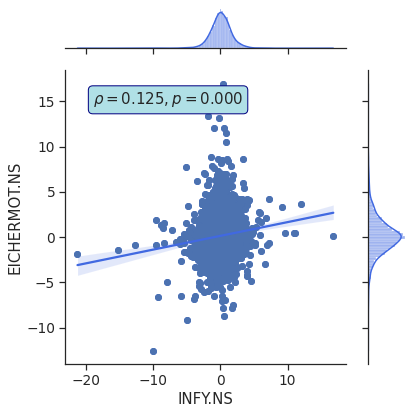

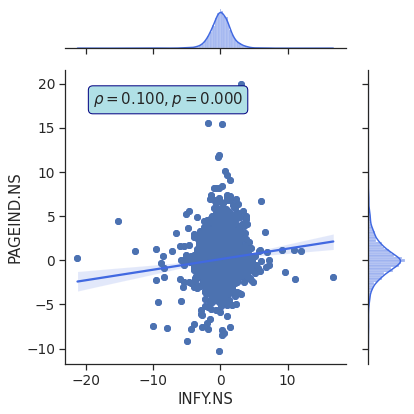

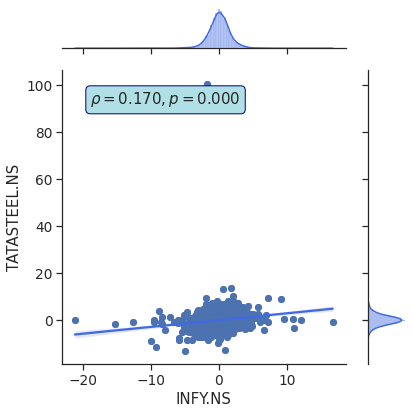

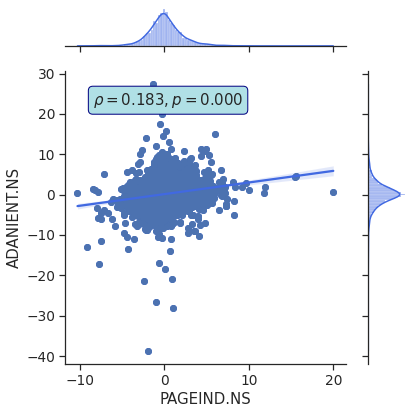

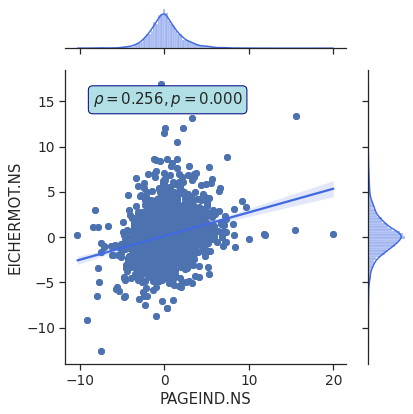

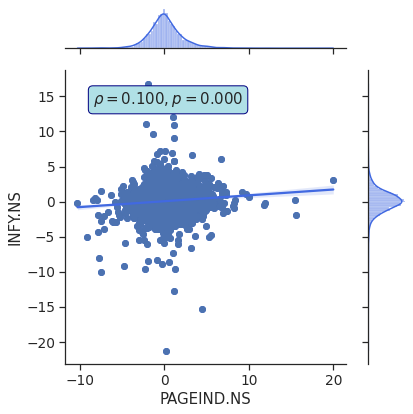

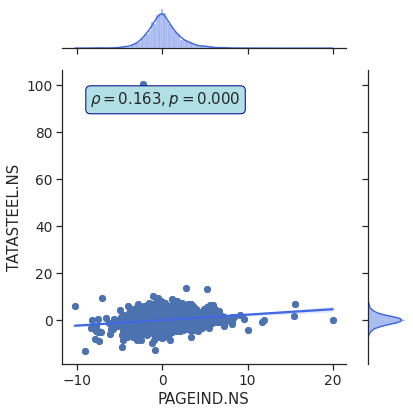

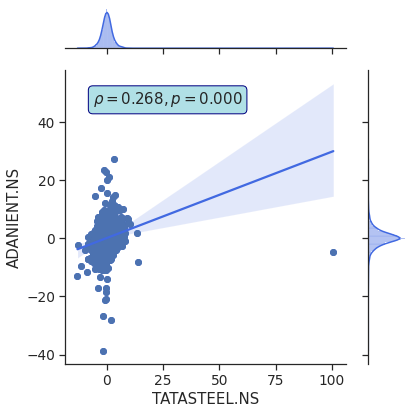

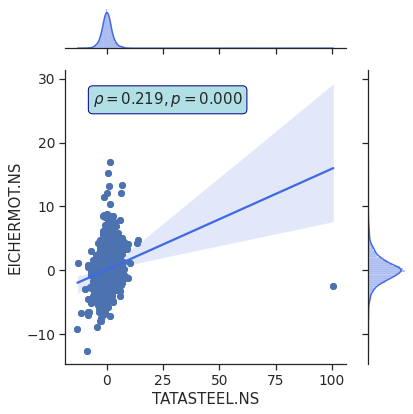

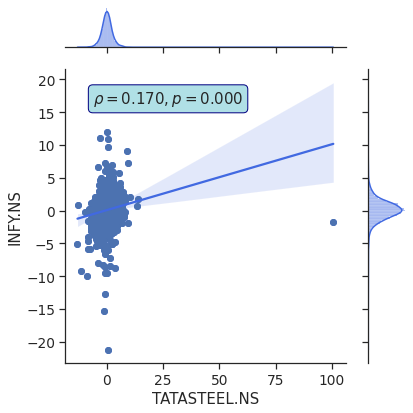

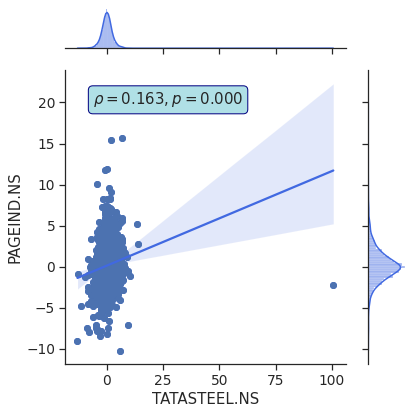

In [27]:
from scipy.stats import stats

def joint_plot(df, a, b):
  g = sns.jointplot(x=df[a], y=df[b], kind='reg', color='royalblue')
  r, p = stats.pearsonr(df[a], df[b])
  g.ax_joint.annotate(f'$\\rho = {r:.3f}, p = {p:.3f}$',xy=(0.1, 0.9), xycoords='axes fraction',ha='left', va='center',bbox={'boxstyle': 'round', 'fc': 'powderblue', 'ec': 'navy'})
  g.ax_joint.scatter(df[a], df[b])
  g.set_axis_labels(xlabel=a, ylabel=b, size=15)
  plt.tight_layout()
  return g
index = 1
for i in pct_chg_df.columns:
  for j in pct_chg_df.columns:
      if i!=j:
        joint_plot(pct_chg_df,i,j)

* All of the stocks are less correlated. So, we can include all the stocks in our portfolio
* Beware! having correlation is not the only parameter to determine which stocks to include in an portfolio and which to remove. There are several other factors at play

### **Volatility analysis**
* Volatility is one of the most important pillars in financial markets. A stock is said to have high volatility if its value can change dramatically within a short span of time. On other hand, lower volatility means that value of stock tends to be relatively steady over a period of time. These movements are due to several factors including demand and supply, sentiment, corporate actions, greed, and fear, etc. Mathematically, volatility is measured using a statistical measure called ‘standard deviation’, which measures an asset’s departure from its average value.
* We have already calculated the intraday returns (daily returns) of the ADANI Enterprises stock and several other stocks. Next, we will calculate the 7-day rolling mean(also called moving average) of the daily returns, then compute the standard deviation (which is square root of the variance) and plot the values.

Text(0.5, 1.0, 'Adani Enterprises Volatility')

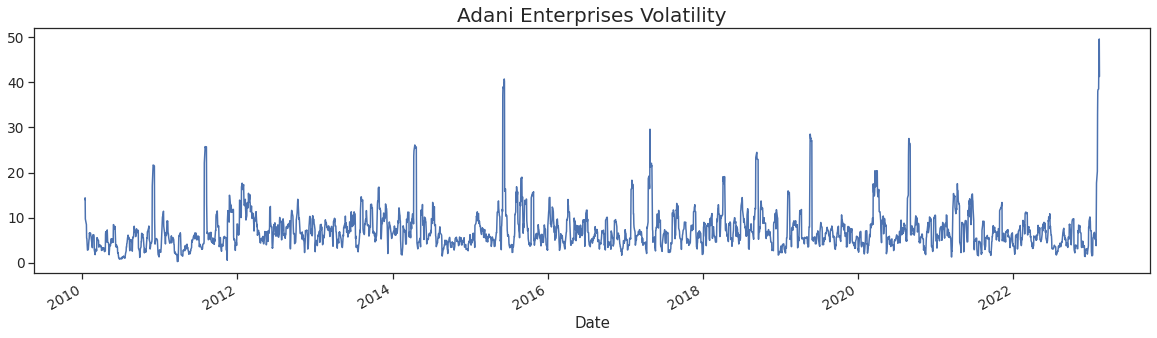

In [28]:
ADANI_vol = pct_chg_df['ADANIENT.NS'].rolling(7).std()*np.sqrt(7)
ADANI_vol.plot(figsize = (20, 5))
plt.title("Adani Enterprises Volatility", fontsize = 20)

Text(0.5, 1.0, 'Stock Returns Volatility')

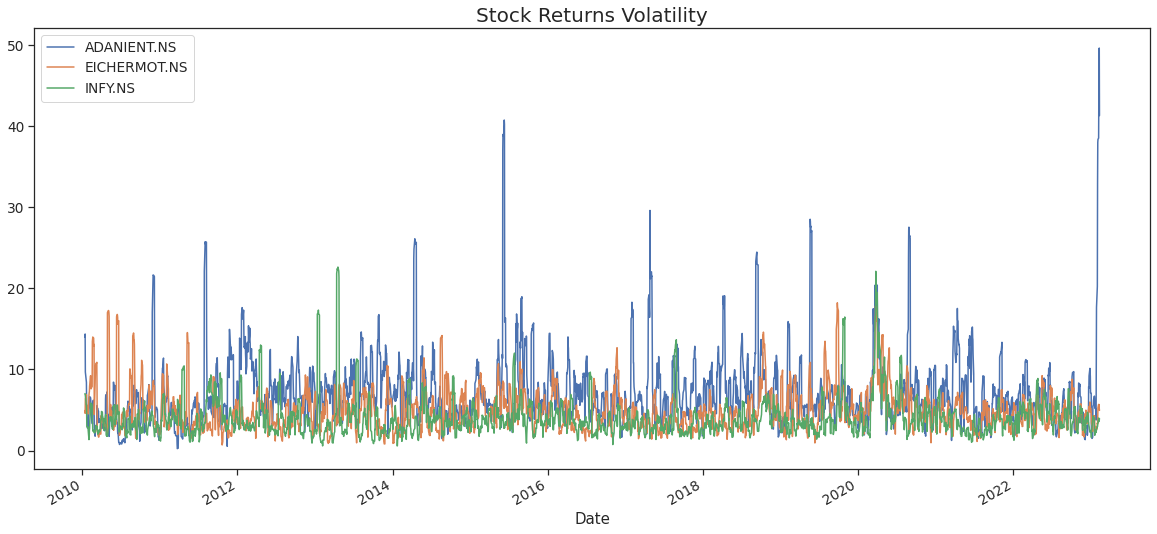

In [29]:
volatility = pct_chg_df[['ADANIENT.NS','EICHERMOT.NS','INFY.NS']].rolling(7).std()*np.sqrt(7)
volatility.plot(figsize = (20, 9))
plt.title("Stock Returns Volatility", fontsize = 20)

* You can observe that ADANI Enterprises stock has higher volatility as compared to Eicher Motors and Infosys stock
* Many traders and investors seek out higher volatility investments in order to make higher profits. If a stock does not move, not only it has low volatility, but also it has low gain potential. On the other hand, a stock or other security with a very high volatility level can have tremendous profit potential, but the risk is equally high.

## **Technical Analysis**
**Technical Indicators**
* Investors usually perform due diligence on a handful of companies to select their target companies. There is no guarantee that an investor will make money and some investors lose some, if not all, of their investments hence it is wise not to invest in a company that is going to go bust or that is overvalued and its share price is already too high.

* Investors usually perform fundamental analysis on a company to understand whether it is worth buying its stock. Once they have selected the chosen companies to invest their money in, they then need to evaluate when to buy the stock. Time is important in stock investing too. This is where the technical indicators can come in handy.

* ***An investor performs technical analysis to compute technical indicators. These indicators can help an investor determine when to buy or sell a stock.***

* There are a large number of technical indicators available that are used by the investors. The key is to use a handful of them that meets the trading strategies of the investors and make sense for the current market situation. Too many indicators can clutter the charts and add unnecessary noise.

* The technical indicators use the OHLCV data. it means the open, high, low, close, and volume of trades. These measures of a stock can be used to compute technical indicators.

* The technical indicators can help us with our investment choices.

* There is a large number of technical indicators available. The technical indicators can be grouped into Momentum Indicators, Volume Indicators, Volatility Indicators, Trend Indicators, and Others Indicators.

### **MACD Technical Indicator**
* The Moving Average Convergence Divergence (MACD) indicator is one of the most popular technical oscillator indicators.
* It helps us understand the relationship between the moving averages. Convergent is when the lines move closer to each other and divergence is when the lines move away from each other. The lines here are the moving averages.
* MACD is a trend-following momentum indicator. It can help us assess the relationship between two moving averages of prices. Subsequently, the MACD indicator can be used to compute a trading strategy that signals us when to buy or sell a stock. 
* Before I begin, it’s worth mentioning that a moving average is a rolling average value of a predefined historic period. As an instance, the simple 10-day moving average is computed by calculating the average of the past 10 days period. The exponential moving average, on the other hand, assigns higher importance to the recent values. It can help us capture the movements of a stock price better.


---


* **Three main steps to calculate MACD:** 
* Step 1: Calculate the MACD line:
  * Calculate the 26-day exponentially weighted moving average of the price. This is the long term line.
  * Calculate the 12-day exponentially weighted moving average of the price. This is the short term line.
  * Calculate the difference between the 26-day EMA and 12-day EMA lines. This is the MACD line.
* Step 2: Calculate the Signal line from the MACD line:
  * Calculate the 9 days exponentially weighted moving average of the MACD line. This is known as the signal line.
* Step 3: Compute the histogram: Distance between MACD and the Signal
  * We can then calculate the difference between the MACD and the Signal line and then plot it as a histogram. The histogram can help us find when the cross-over is about to happen.

* ***The histogram is the difference between MACD and the Signal line***


* The histogram’s length can be used to understand the trend better. When the histogram bars are not increasing then it can imply that the prices are not volatile and a big move might happen in the opposite direction soon.

* Although the usual approach is to use the parameters as described above but it really depends on the stock, the market, and the investor. We can choose different parameters and optimize the parameters that meet our trading style and the stock we are interested in.


---


**Strategy:**
* We can use the cross-over between MACD and the Signal line to create a simple trading strategy. This is where the MACD line and the signal line cross over each other.
  * Sell Signal: The cross over: When the MACD line is below the signal line.
  * Buy Signal: The cross over: When the MACD line is above the signal line

**Bullish vs Bearish:**
  * Bearish: When the MACD and Signal lines are below 0 then the market is bearish.
  * Bullish: When the MACD and Signal lines are above 0 then the market is bullish.

---

**Key Points**
* MACD is based on moving averages which imply that the past can impact the future. This is not always true. Additionally, there is a lag present due to the moving averages hence the generated signals are after the move has started.

* The standard setting for MACD is the difference between the 12- and 26-period EMAs. We could use MACD(5,35,5) for more sensitive stocks and MACD(12,26,9) might be better suited for weekly charts. It all depends on the investor.

* One keynote to remember is to always analyze the short and long-term price trend along with other factors. And rememeber sometimes a stock that might appear overbought might still move upwards due to other market factors.

In [30]:
!pip install ta

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [31]:
from ta.trend import MACD

In [32]:
def generate_buy_sell_signals(condition_buy, condition_sell, dataframe, strategy):
    last_signal = None
    indicators = []
    buy = []
    sell = []
    for i in range(0, len(dataframe)):
        # if buy condition is true and last signal was not Buy
        if condition_buy(i, dataframe) and last_signal != 'Buy':
            last_signal = 'Buy'
            indicators.append(last_signal)
            buy.append(dataframe['Close'].iloc[i])
            sell.append(np.nan)
        # if sell condition is true and last signal was Buy
        elif condition_sell(i, dataframe)  and last_signal == 'Buy':
            last_signal = 'Sell'
            indicators.append(last_signal)
            buy.append(np.nan)
            sell.append(dataframe['Close'].iloc[i])
        else:
            indicators.append(last_signal)
            buy.append(np.nan)
            sell.append(np.nan)

    dataframe[f"{strategy}_Last_Signal"] = np.array(last_signal)
    dataframe[f"{strategy}_Indicator"] = np.array(indicators)
    dataframe[f"{strategy}_Buy"] = np.array(buy)
    dataframe[f"{strategy}_Sell"] = np.array(sell)

In [33]:
def get_macd(company):
    close_prices = company['Close']
    window_slow = 26
    signal = 9
    window_fast = 12
    macd = MACD(close_prices, window_slow, window_fast, signal)
    company['MACD'] = macd.macd()
    company['MACD_Histogram'] = macd.macd_diff()
    company['MACD_Signal'] = macd.macd_signal()

    generate_buy_sell_signals(
    lambda x, company: company['MACD'].values[x] < company['MACD_Signal'].iloc[x],
    lambda x, company: company['MACD'].values[x] > company['MACD_Signal'].iloc[x],
    company,
    'MACD')
    return company

In [34]:
def plot_price_and_signals(fig, company, data, strategy, axs):
    last_signal_val = data[f"{strategy}_Last_Signal"].values[-1]
    last_signal = 'Unknown' if not last_signal_val else last_signal_val
    title = f'Close Price Buy/Sell Signals using {strategy}.  Last Signal: {last_signal}'
    fig.suptitle(f'Top: ADANI Stock Price. Bottom: {strategy}')

    if not data[f'{strategy}_Buy'].isnull().all():
        axs[0].scatter(data.index, data[f'{strategy}_Buy'], color='green', label='Buy Signal', marker='^', alpha=1)
    if not data[f'{strategy}_Sell'].isnull().all():
        axs[0].scatter(data.index, data[f'{strategy}_Sell'], color='red', label='Sell Signal', marker='v', alpha=1)
    axs[0].plot(company['Close'], label='Close Price', color='blue', alpha=0.35)

    plt.xticks(rotation=45)
    axs[0].set_title(title)
    axs[0].set_xlabel('Date', fontsize=20)
    axs[0].set_ylabel('Close Price', fontsize=18)
    axs[0].legend(loc='upper left')
    axs[0].grid()

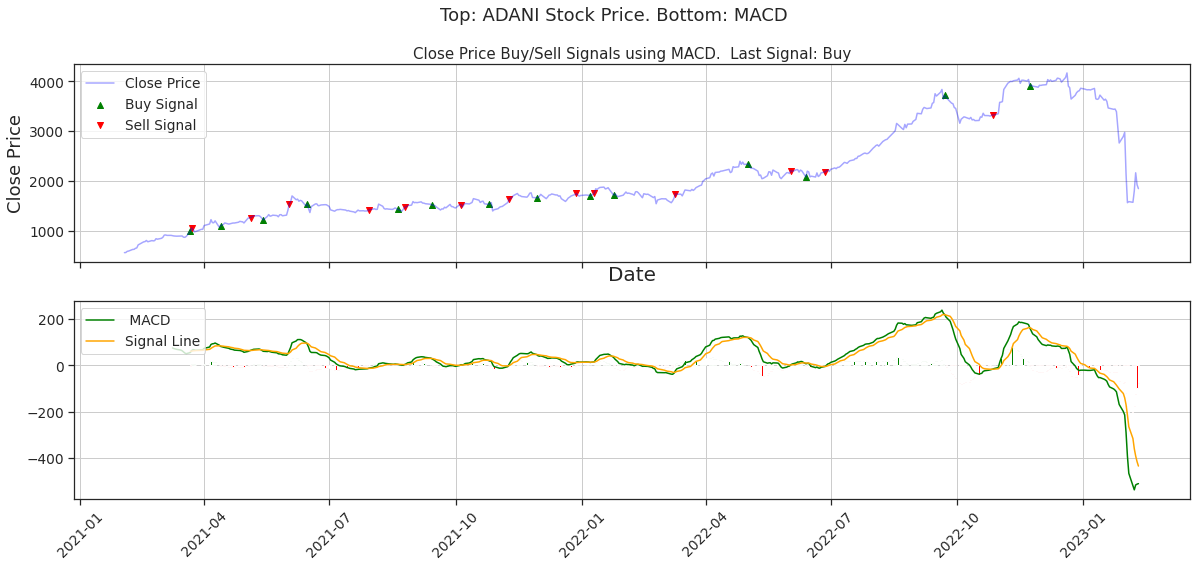

In [35]:
def plot_macd(company):
    macd = company
    # Create and plot the graph
    fig, axs = plt.subplots(2, sharex=True, figsize=(20,8))
    plot_price_and_signals(fig, company, macd, 'MACD', axs)

    axs[1].plot(macd['MACD'], label=' MACD', color = 'green')
    axs[1].plot(macd['MACD_Signal'], label='Signal Line', color='orange')
    positive = macd['MACD_Histogram'][(macd['MACD_Histogram'] >= 0)]
    negative = macd['MACD_Histogram'][(macd['MACD_Histogram'] < 0)]
    axs[1].bar(positive.index, positive, color='green')
    axs[1].bar(negative.index, negative, color='red')    
    axs[1].legend(loc='upper left')
    axs[1].grid()
    # print(os.path.abspath(image))
    plt.show()
plot_macd(get_macd(df.iloc[-504:]))

### **RSI Technical Indicator**
* RSI stands for Relative Strength Index. It’s a widely used technical indicator and this is mainly due to its simplicity. It relies on the market and we can use the indicator to determine when to buy or sell a stock.

* RSI requires us to compute the recent gains and losses. The recent specified time period is subjective in nature. We use the RSI indicator to measure the speed and change of price movements.

* RSI is an oscillating indicator. It can help us understand the momentum better. Note, momentum is the change of price and size. Therefore, the RSI indicator can help us understand when the stock price will change its trend.

* The key to using this indicator is to understand whether a stock is overbought or oversold.

---

**Calculation:**
* The calculation is extremely simple.

  * Firstly, we have to determine the time period. Usually, a 14 day time period is chosen but it could depend on the investor’s own view of the market and the stock.
  * Secondly, we have to compute the relative strength which is known as RS. RS is the average gain over the average loss. To explain it further, RS is the average gain when the price was moving up over the average loss when the price change was negative.
  * Calculate RSI as 100 — (100/(1+RS))
  * The RSI value is between 0–100
---
**Strategy:**
* **Overbought:** When the RSI is above 70%. Essentially, overbought is when the price of a stock has increased quickly over a small period of time, implying that it is overbought.
* The price of an overbought stock usually decreases in price.
* **Oversold:** When the RSI is below 30%. Essentially, oversold is when the price of a stock has decreased quickly over a small period of time, implying that it is oversold. The price of an oversold stock usually increases in price.

* There are way too many strategies that are dependent on the RSI indicator.

* A simple strategy is to use the RSI such that:

* **Sell:** When RSI increases above 70%

* **Buy:** When RSI decreases below 30%.

* We might decide to use different parameters. The point is that we can optimize the parameters that meet our trading style, the market and the stock we are interested in.

---

**Key Points**
* The signals are not always accurate. The RSI signals are dependent on the price of the stock only and this is not the only factor that can change the price of a stock. Plus it’s highly subjective.

* As an instance, a company can launch a product when a stock is oversold and that could further increase the price of the stock.

* Therefore, always consider the market factors and also use the short and long term price trend when buying or selling a stock.

In [36]:
from ta.momentum import RSIIndicator
# from ta.volatility import BollingerBands

def get_rsi(company):
    close_prices = company['Close']
    # dataframe = company.technical_indicators
    rsi_time_period = 20

    rsi_indicator = RSIIndicator(close_prices, rsi_time_period)
    company['RSI'] = rsi_indicator.rsi()

    low_rsi = 40
    high_rsi = 70

    generate_buy_sell_signals(
        lambda x, company: company['RSI'].values[x] < low_rsi,
        lambda x, company: company['RSI'].values[x] > high_rsi,
    company, 'RSI')

    return company

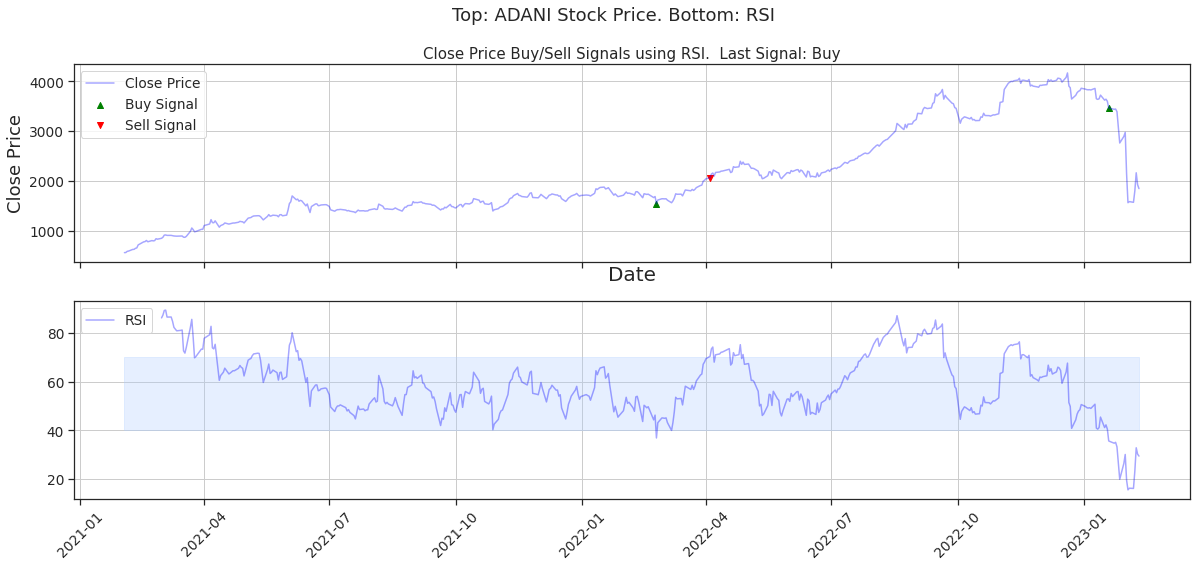

In [37]:
def plot_rsi(company):
      # image = f'images/{company.symbol}_rsi.png'
      rsi = company
      low_rsi = 40
      high_rsi = 70

      #plt.style.use('default')
      fig, axs = plt.subplots(2, sharex=True, figsize=(20, 8))
      plot_price_and_signals(fig, company, rsi, 'RSI', axs)
      axs[1].fill_between(rsi.index, y1=low_rsi, y2=high_rsi, color='#adccff', alpha=0.3)
      axs[1].plot(rsi['RSI'], label='RSI', color='blue', alpha=0.35)
      axs[1].legend(loc='upper left')
      axs[1].grid()
      plt.show()
plot_rsi(get_rsi(df.iloc[-504:]))

### **Bollinger Bands Technical Indicator**
* It is one of the most popular technical indicators. And this is mainly due to its simplicity.

* There are two main components of a Bollinder band indicator:
  1. Volatility Bolinger Bands
  2. Moving averages
---
* **Essentially, the steps are:**
  * Middle band: Calculate the moving average of the price, usually 20 days moving average.
  * Upper band: Calculate two standard deviations above the moving average.
  * Lower band: Calculate two standard deviations below the moving average.

* The more volatile the stock prices, the wider the bands from the moving average. It’s important to look at the shape/trend of the bands along with the gap between them to understand the trend and stock better.

* The standard deviations capture the volatile movements and hence we compute standard deviations above and below the upper and lower bands to capture the outliers. Consequently, 95% of the price movements will fall between the two standard deviations
---
* **Strategy:**
* A simple trading strategy could be to:
  * Sell: As soon as the market price touches the upper Bollinger band
  * Buy: As soon as the market price touches the lower Bollinger band

* This is based on the assumption that the stock must fall back (from the uptrend) and eventually touch the bottom band.
* At times, the Bollinger Band Indicator signals us to buy a stock but an external market event such as negative news can change the price of the stock. Therefore it’s important to use the indicator as just an indicator that can sometimes be wrong.

In [38]:
from ta.volatility import BollingerBands
def get_bollinger_bands(company):
    close_prices = company['Close']
    # dataframe = company.technical_indicators

    window = 20
    indicator_bb = BollingerBands(close=close_prices, window=window, window_dev=2)

    # Add Bollinger Bands features
    company['Bollinger_Bands_Middle'] = indicator_bb.bollinger_mavg()
    company['Bollinger_Bands_Upper'] = indicator_bb.bollinger_hband()
    company['Bollinger_Bands_Lower'] = indicator_bb.bollinger_lband()

    generate_buy_sell_signals(
        lambda x, company: company['Close'].values[x] < company['Bollinger_Bands_Lower'].values[x],
        lambda x, company: company['Close'].values[x] > company['Bollinger_Bands_Upper'].values[x],
        company, 'Bollinger_Bands')

    return company

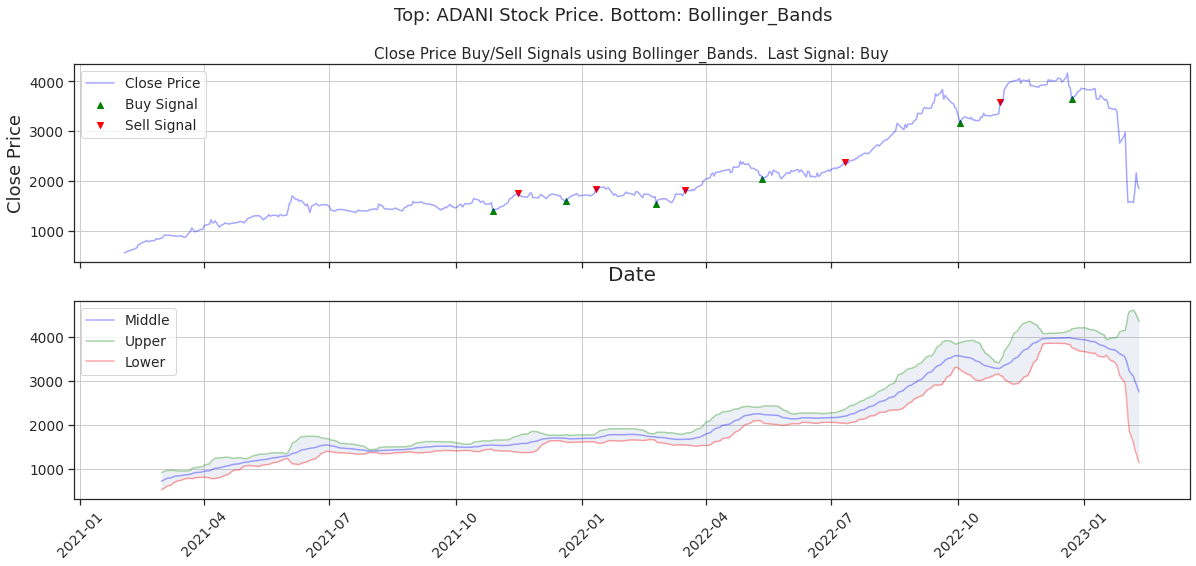

In [39]:
def plot_bollinger_bands(company):
        # image = f'images/{company.symbol}_bb.png'
        bollinger_bands = company

        fig, axs = plt.subplots(2, sharex=True, figsize=(20, 8))
        plot_price_and_signals(fig, company, bollinger_bands, 'Bollinger_Bands', axs)
        axs[1].plot(bollinger_bands['Bollinger_Bands_Middle'], label='Middle', color='blue', alpha=0.35)
        axs[1].plot(bollinger_bands['Bollinger_Bands_Upper'], label='Upper', color='green', alpha=0.35)
        axs[1].plot(bollinger_bands['Bollinger_Bands_Lower'], label='Lower', color='red', alpha=0.35)
        axs[1].fill_between(bollinger_bands.index, bollinger_bands['Bollinger_Bands_Lower'], bollinger_bands['Bollinger_Bands_Upper'], alpha=0.1)
        axs[1].legend(loc='upper left')
        axs[1].grid()

        plt.show()
plot_bollinger_bands(get_bollinger_bands(df.iloc[-504:]))

* The library has a bonus function. We can add all of the available technical indicators that have been coded in the ta library by calling the add_all_ta_features function.

* For this code to work, create a dataframe and ensure it contains the Open, High, Low and Close columns.

In [40]:
# df = add_all_ta_features(df, open="Open", high="High", low="Low", close="Close", volume="Volume_BTC", fillna=True)

**Conclusion**
* The signals generated by the technical indicators are theoretical in nature. * There is no guarantee that the signals are going to be absolutely applicable all the time. Plus the market can behave in an unexpected manner.
* Investors can lose some, if not all, of their investments therefore the indicators should be used wisely. It’s important to note that stock investment should not be taken lightly. On top of that, the market can not always be timed.
* Usually, the technical indicators are combined together to achieve a better indicator. As an instance, the Bollinger band and MACD indicators can be combined with the RSI measure to better decide whether it is the right time to buy/sell.
* It is important to adjust the parameters and decide the optimum trading strategy based on your view of the market, your trading style, and the investment stock. Always backtest the trading strategy.

## **Fundamental Analysis**
* There are thousands of publicly listed companies. We can choose to invest our money in all of them but some of the companies are better for our investment than the others.
* There are a large number of methodologies available to analyze and measure the health of a company.
* One of the key methodologies is known as fundamental analysis.
* Fundamental analysis is when an analyst values a stock of a company by assessing the company-level factors such as the state of its balance sheet, market capitalization, how the management of the company is, and so on.
* The fundamental analysis helps us understand what to look for in a company. The result of fundamental analysis is a set of fundamental indicators.
* Therefore, the fundamental analysis uses both the intrinsic value of the stock along with the external factors to compute its value.
* The more we understand about the company we want to invest in, the higher the chances of us deriving the true value of the company.

**Quick Note Worth Mentioning**
* If we know that a company is healthy, it is investing its income to grow itself and is launching new products, its net income is more than its costs and its management is effective, it does not have any debt and the share price is undervalued then we can feel confident that the value of the company is likely to grow and the company won’t go bankrupt anytime soon.
* No one can accurately predict the stock market. The market can be volatile and it can change due to an unlimited number of factors.
* I have presented my opinions in this article. This article does not guarantee any positive returns and should be used for educational purposes only. The opinions expressed in the article may change without notice as new information is obtained.
* An investor can lose some, if not all, of his/her investments therefore it is important to seek a professional’s advice before investing money in a company.
* The stock market cannot always be timed and there is no guarantee that an investor will earn a profit.
* The key concept to understand is that each company has its intrinsic value. The fundamental analysis is all about calculating the intrinsic value of the company. This analysis is subjective in nature. There are way too many indicators available and a mix of them can help us value a company.


**Basic Understanding**
* The fundamental analysis should help us understand the following key questions:
  1. What is the market capitalization of a company? Is the company growing and earning profits?
  2. Is my target company under debt? What is their debt-to-equity ratio?
  3. Is the company undervalued or overvalued in terms of its market and book value, sales, earnings, and profits?
  4. What is their price per earnings and price per earnings growth ratios?
  5. What are the returns on assets and equities? What is the dividend payout ratio?
* There are a large number of useful fundamental indicators such as dividend yield, EPS, and so on

### **Valuation measures**
#### **Market Capitalization:**
* Let’s start by understanding what market capitalization is. Market capitalization is also known as market cap. The market cap is one of the measures to determine the size of a company. We can use the market cap measure to categorize a company into a large, medium, or small-sized company category.
* The market capital figure informs us about the market value of a company which is simply the product of outstanding shares and the current price of one share. Therefore, we can use the market cap figure to estimate how valuable the company is to the market.
* Usually, large-cap companies have a market cap greater than $10Billion, the medium is anywhere from $2B to $10B and the small-cap is anywhere below $2B.
We can further break the cap down into more categories if needed. Generally, it’s wise to diversify the portfolio and add a mix of large, medium, and small-cap companies’ stocks in the portfolio.

* Author’s Opinion: The smaller cap stocks are generally riskier and are more volatile than the large market cap companies. The large-cap companies yield fewer returns than the small-cap companies but they are generally safer investments.

In [67]:
import yfinance as yf
adanient = yf.Ticker("ADANIENT.NS")
marketCap = adanient.fast_info['marketCap']
marketCap

2028618718696.2656

#### **PS Ratio**
* The P/S ratio, which is also known as the Price To Sales Ratio, is used to inform about how much the market capitalization exceeds the sales of a company. Typically, past 12 months sales are used.
* It is essentially the ratio of market capitalization to the sales of a company. Therefore, the ratio can help us understand how much the other investors are paying for one dollar of sales of stock.
* The ratio is computed by dividing the market capitalization of the share by the total sales of a company. Therefore, as the number of outstanding shares or the share price of a company increases, the ratio increases. If the sales of a company decrease then the ratio increases.
* Author’s Opinion: The key point to take is that if the ratio is lower than 1 then the company is undervalued and if the ratio is greater than 1 then the company is overvalued. Generally, the higher the value, the more the stock is valued by the investors.

In [60]:
PS = adanient.info['priceToSalesTrailing12Months']
PS

1.6540862

#### **PE Ratio**
* The Price to Earnings ratio is one of the most used ratios within the fundamental analysis measures. It can help us determine whether the company is over or undervalued with respect to other companies within the industry.
* There are multiple ways to calculate the ratio. We can either take the market capitalization and divide it by the earnings or we can take the current share price and divide by the Earnings Per Share (EPS). The earnings per share inform us how much the company makes per share. It is merely the total earnings of a company divided by the outstanding shares. If the EPS is positive then the company is profitable. Therefore it makes more than it costs.
* PE ratio is the Trailing Price To Earning ratio. The word trailing here refers to the earnings of the last 12 months. Essentially, we take the market capitalization and divide it by the actual last 12 month’s earnings per share. We can use the PE ratios to compare similar companies within an industry and to determine whether the company stock price is over or undervalued.
* A company with a higher PE ratio usually has a higher earnings growth rate.
* Author’s Opinion: The key point to take is that PE needs to be compared with the companies within the same industry. The higher the value, the more the company is valued.

In [57]:
PE = adanient.info['trailingPE']
PE

163.37006

#### **PEG ratio**
* The PEG ratio is also known as the Price To Earnings Ratio Over Earnings Growth Rate. This is computed by calculating the PE ratio and dividing by the earnings growth. We can use the annual earnings growth rate.
* We can use the PEG ratio to compute the true value of a stock. The lower the PEG ratio, the undervalue the stock is. The PEG ratio can help us understand how fast a company can grow.
* The higher the PEG ratio, the more the company is valued, therefore the lower the value, the undervalue the company is. When both the PE and PEG ratios are high then they are good indicators that the company is overvalued.

In [61]:
PEG = adanient.info['pegRatio']
PEG

#### **PB Ratio = Price/Book Ratio**
* The price to book ratio is computed by taking the market capitalization and dividing it by the book value of the company. We can also compute it by taking the current share price and dividing it by the book value per share.
* The book value is the difference between the assets and liabilities. Imagine if all of the assets of a company are liquidated to pay all of the liabilities then whatever we are left with is known as book value. The market value on the other hand is the price that the market values the company as.
* Author’s Opinion: The key point to take is that if the ratio is lower than 1 then the company is undervalued and if the ratio is higher than 1 then it is overvalued. The higher the value, the more the company is valued. We should ensure that the book value and market value of a company are positive. Generally, the lower the ratio, the better the investment

In [59]:
PB = adanient.info['priceToBook']
PB

6.417369

### **Management Effectiveness**
#### **ROA**
* Each company has its assets, liabilities, and annual net income that it generates from the assets. The ROA stands for Return On Assets.
The ROA measure informs us about the income the company can generate from its assets.
  * $ROA = \frac{Net Income}{Average Assets}$ 
* Therefore if a company has effective management then it will be reflected in the ROA.
* Author’s Opinion: The higher the ROA value, the more effective the management of a company because the more the company can possibly generate more net income from its assets.

In [74]:
ROA = adanient.info['returnOnAssets']
ROA

0.026889998

#### **ROE**
* The ROE stands for Return On Equity.
* Remember that shareholder equity, or commonly known as equity, is the difference between the assets and the liabilities of a company.
*  $ROA = \frac{Net Income}{shareholder equity}$ 
* This is again an indicator of how efficient the management of a company is. It informs us about the returns of a company in relation to the equity held by its stockholders.
* Author’s Opinion: The higher the value, the better the company in generating returns.

In [62]:
ROE = adanient.info['returnOnEquity']
ROE

0.0414

### **Income Statement**
#### **Profit Margin**
* Profit margin is an important measure as it helps us understand the degree to which the company is generating income over its revenue. It is the ratio of the net income of a company over its revenue.
* Therefore, if a company generates less income than its revenue then it will have a lower profit margin. It is a measure of a company’s efficiency.
These figures are available in the income statement of a company.
* Author’s Opinion: A company that generates a higher profit margin generates higher income when compared to its expenses and therefore is considered a healthier company.

In [63]:
profitMargins = adanient.info['profitMargins']
profitMargins

0.00997

### **Operating Margin**
* The operating margin is another measure of profit.
* It is calculated by dividing the operating profit by the sales revenue. The profit is computed by calculating the difference between the revenue and all of the costs of a company.
* These figures are available in the income statement of a company.
Author’s Opinion: We might be able to conclude that the higher the operating margin, the profitable the company with lower costs.

In [64]:
operatingMargins = adanient.info['operatingMargins']
operatingMargins

0.03603

### **Balance Sheet & Dividends**
#### **Current Ratio**
* The current ratio is one of the important balance sheet ratios to consider  
* It is a liquidity ratio and can inform us about the health of a company. It indicates whether the company can pay off its short-term debt.
* It is calculated by dividing the current assets over the current liabilities.
* The key to remember is that the higher the current ratio, the better the company can be considered for investment.
* It is a good indication to invest in a company that has higher assets than its liabilities.
* Author’s Opinion: Ideally, the current ratio should be greater than 1 indicating that it can pay-off its liabilities without borrowing the money.

In [72]:
currentRatio = adanient.info['currentRatio']
currentRatio

0.892

#### **Cash Per Share**
* This is the available cash over the number of outstanding shares.
* Author’s Opinion: The more cash there is in a company, the more the business can spend on itself and make positive changes for the shareholders by growing the company or its products as an instance.

In [73]:
totalCashPerShare = adanient.info['totalCashPerShare']
totalCashPerShare

36.122

#### **D/S Ratio = Total Debt/Equity Ratio**
* This measure is calculated by taking the ratio of liabilities of a company by the equity of the company.
* Remember the equity of a company is the difference between its assets and liabilities. Therefore, a positive number is considered healthier.
* Author’s Opinion: Companies that have a higher debt ratio can potentially default on their debt therefore it’s wise to choose a company with lower debt to equity ratio and ensuring that it is a positive number.

In [65]:
debtToEquity = adanient.info['debtToEquity']
debtToEquity

113.861

#### **Payout Ratio**
* The payout ratio is directly related to the dividends that the company pays to its shareholders. Some of the most established companies pay a percentage of their earnings to their shareholders.
* The payout ratio is calculated by dividing the dividend amount per share by the earnings per share.
* Some companies do not pay dividends whereas some companies invest a large portion of their income back into their business. When the payout ratio is low then it could mean that the company is investing back into its business. This again could imply, that the company is expanding.
* Author’s Opinion: When the payout ratio is high (higher than 100) then it means the company is paying more in dividends than its earnings.

In [66]:
payoutRatio = adanient.info['payoutRatio']
payoutRatio

0.091800004

**Yahoo finance github link and syntax:**
* https://github.com/ranaroussi/yfinance

```
import yfinance as yf

adanient = yf.Ticker("ADANIENT.NS")

# get all stock info (slow)
adanient.info
# fast access to subset of stock info (opportunistic)
# msft.fast_info

# get historical market data
# hist = msft.history(period="1mo")

# show meta information about the history (requires history() to be called first)
# msft.history_metadata

# show actions (dividends, splits, capital gains)
# msft.actions
# msft.dividends
# msft.splits
# msft.capital_gains  # only for mutual funds & etfs

# show share count
# - yearly summary:
# msft.shares
# - accurate time-series count:
# msft.get_shares_full(start="2022-01-01", end=None)

# show financials:
# - income statement
# msft.income_stmt
# msft.quarterly_income_stmt
# - balance sheet
# msft.balance_sheet
# msft.quarterly_balance_sheet
```

# **<center>THE END</center>**